In [1]:
import time
from dask.distributed import Client
from main import parallel_execution, batch_parallel_execution, batch_parallel_execution2
from main import data_files

In [2]:
client = Client(n_workers=4, threads_per_worker=1)

In [3]:
print(client)

<Client: 'tcp://127.0.0.1:45865' processes=4 threads=4, memory=15.49 GiB>


In [7]:
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 15.49 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41589,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 15.49 GiB
Comm: tcp://127.0.0.1:43025,Total threads: 2
Dashboard: http://127.0.0.1:33375/status,Memory: 7.74 GiB
Nanny: tcp://127.0.0.1:36079,


In [4]:
print('Parallel execution ...')
click = time.time()
most_mentioned, exp, _ = batch_parallel_execution(data_files[:100], 20, client=client)
clack = time.time()
par_runtime=clack-click
print(most_mentioned[['category', 'name', 'total_mentions']])

print(f'Parallel runtime: {par_runtime}')

Parallel execution ...
                          category  \
0                  All Departments   
1                   Amazon Devices   
2                 Amazon Launchpad   
3            Arts, Crafts & Sewing   
4   Automotive Parts & Accessories   
5                             Baby   
6           Beauty & Personal Care   
7                            Books   
8                      CDs & Vinyl   
9        Cell Phones & Accessories   
10       Clothing, Shoes & Jewelry   
11                     Electronics   
12          Grocery & Gourmet Food   
13                        Handmade   
14   Health, Household & Baby Care   
15                  Home & Kitchen   
16         Industrial & Scientific   
17          Magazine Subscriptions   
18                     Movies & TV   
19             Musical Instruments   
20                 Office Products   
21            Patio, Lawn & Garden   
22                    Pet Supplies   
23                    Prime Pantry   
24               Sports & O

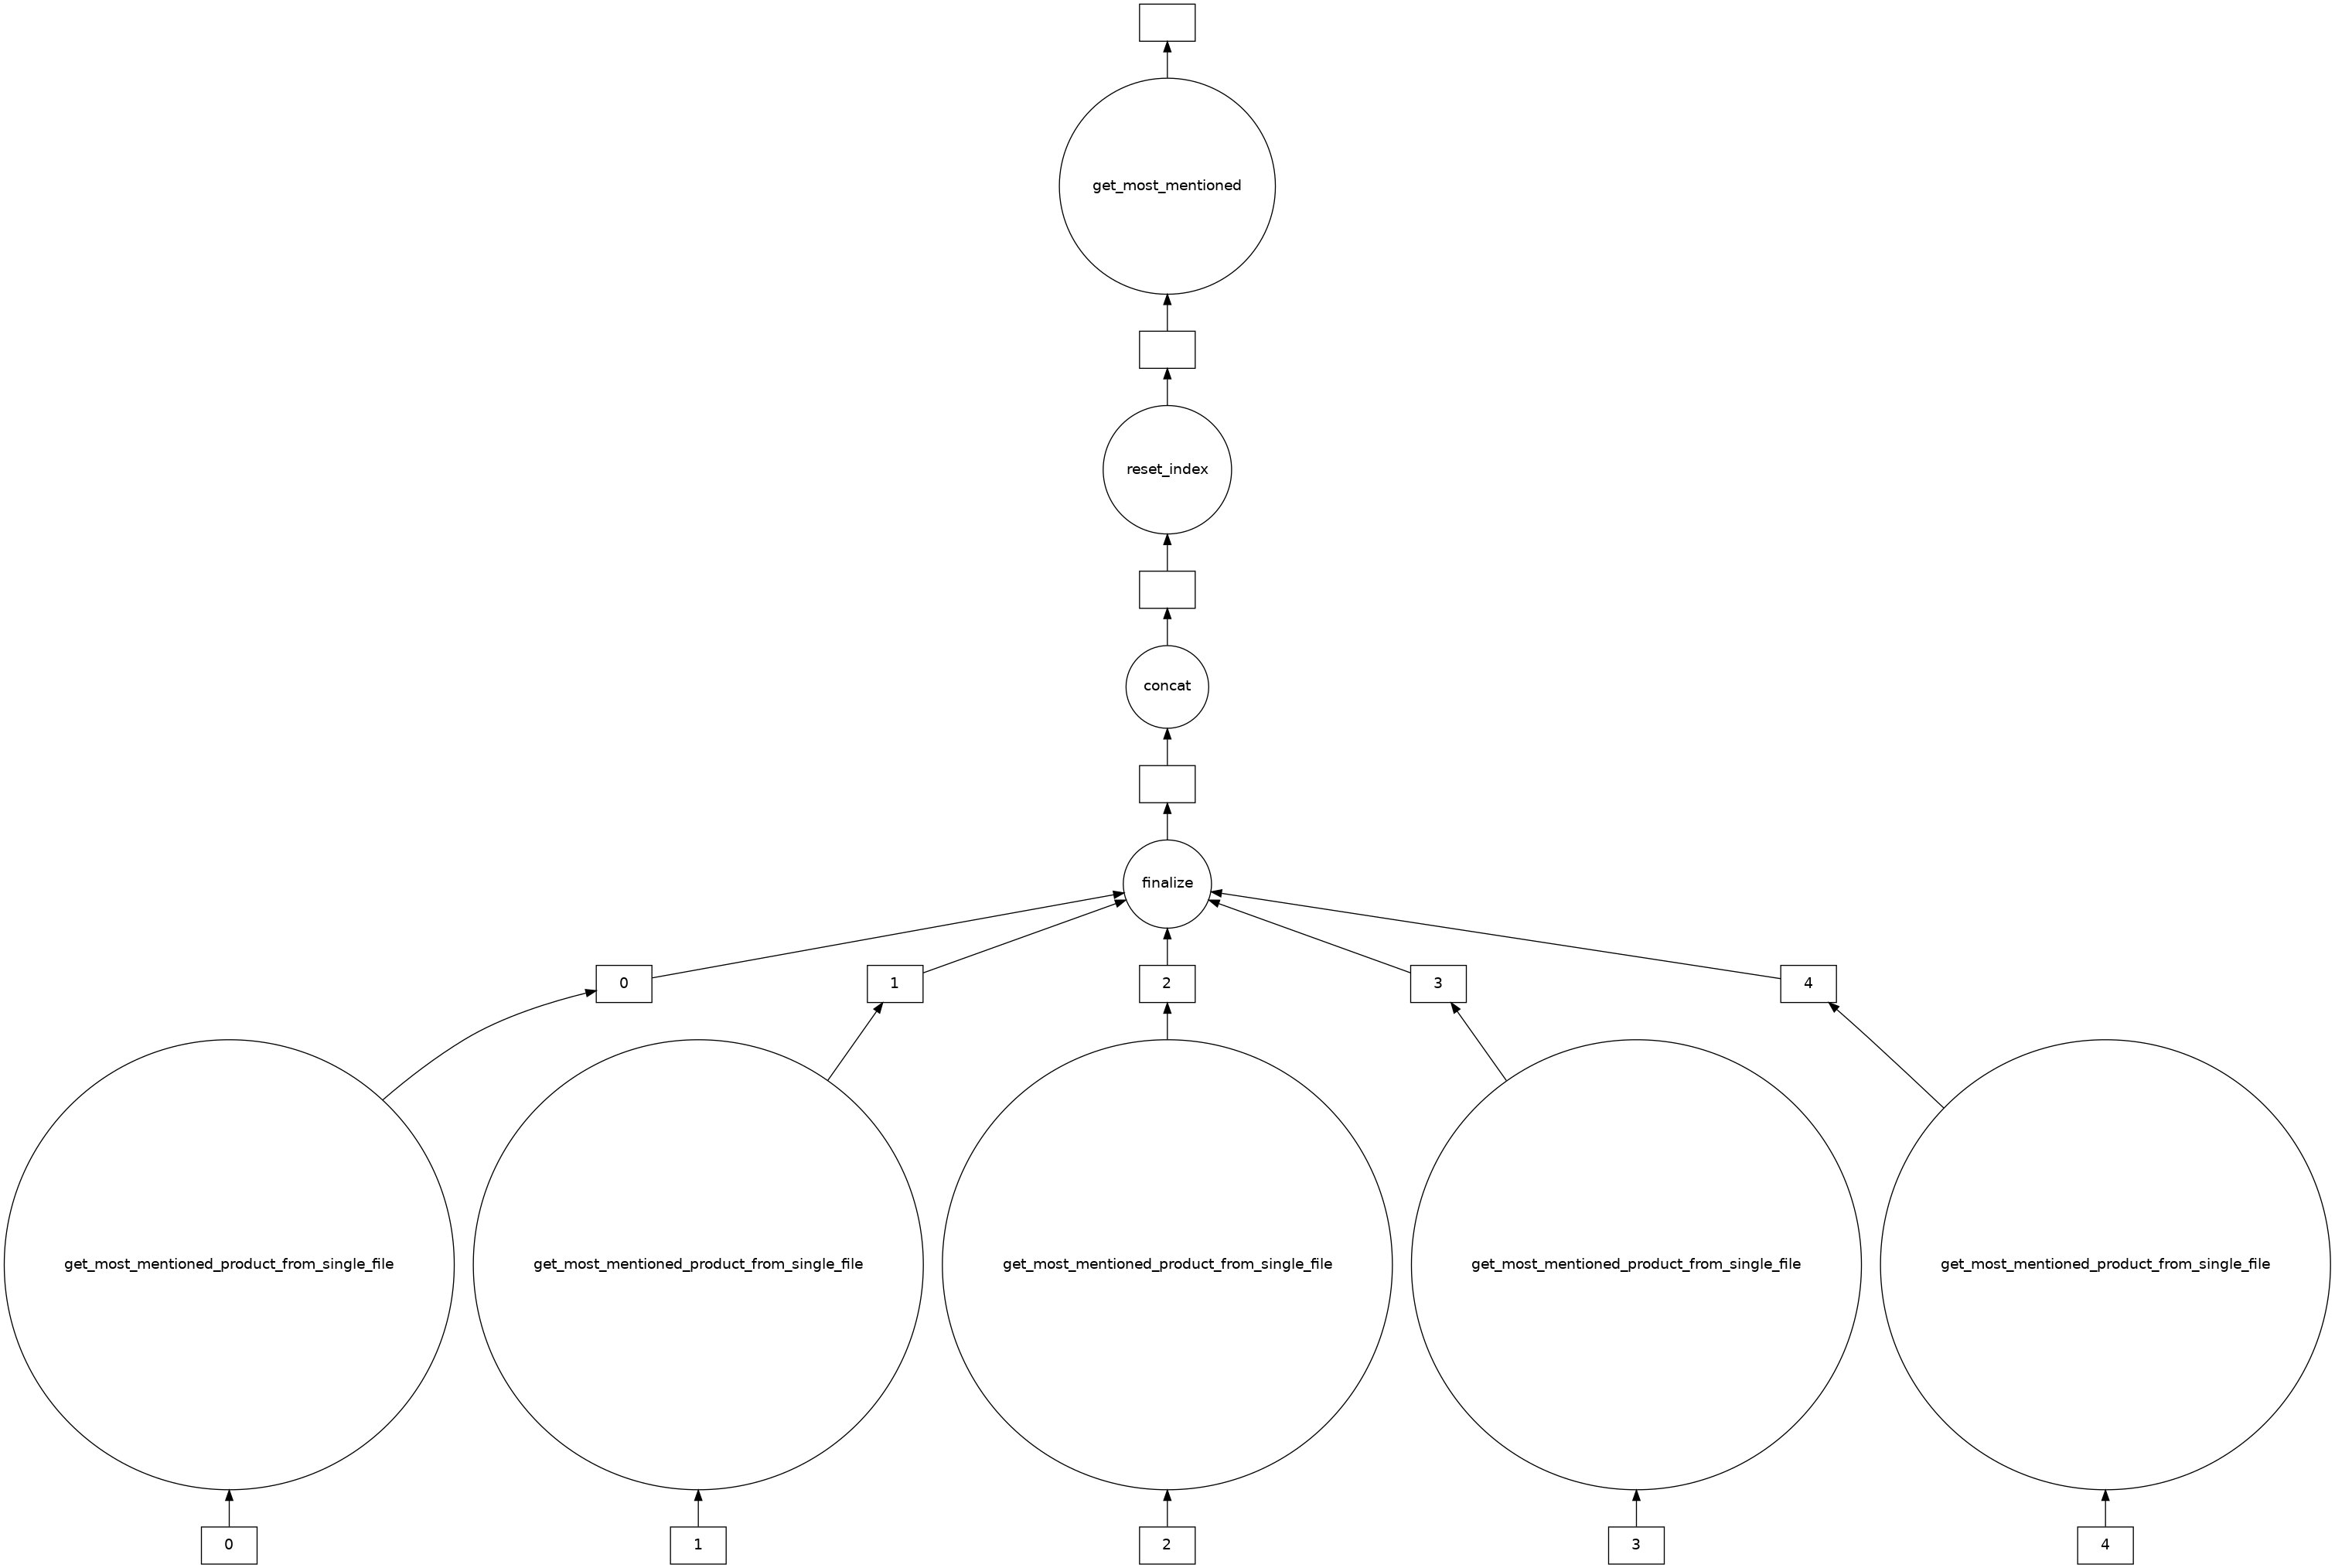

In [5]:
exp.visualize()

In [10]:
print('Parallel execution ...')
click = time.time()
most_mentioned = batch_parallel_execution2(data_files[:100], 20, client=client)
most_mentioned = most_mentioned[0]
clack = time.time()
par_runtime=clack-click
print(most_mentioned[['category', 'name', 'total_mentions']])

print(f'Parallel runtime: {par_runtime}')

Parallel execution ...
                          category  \
0                  All Departments   
1                   Amazon Devices   
2                 Amazon Launchpad   
3            Arts, Crafts & Sewing   
4   Automotive Parts & Accessories   
5                             Baby   
6           Beauty & Personal Care   
7                            Books   
8                      CDs & Vinyl   
9        Cell Phones & Accessories   
10       Clothing, Shoes & Jewelry   
11                     Electronics   
12          Grocery & Gourmet Food   
13                        Handmade   
14   Health, Household & Baby Care   
15                  Home & Kitchen   
16         Industrial & Scientific   
17          Magazine Subscriptions   
18                     Movies & TV   
19             Musical Instruments   
20                 Office Products   
21            Patio, Lawn & Garden   
22                    Pet Supplies   
23                    Prime Pantry   
24               Sports & O

In [11]:
client.close()